# INF552:Homework6 
### 1. Supervised, Semi-Supervised, and Unsupervised Learning
##### &nbsp; (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set from: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes. Use the first 20% of the positive and negative classes in the file as the test set and the rest as the training set.

In [413]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#load csv 
data = pd.read_csv('wdbc.csv', sep = ',', header = None)

In [414]:
print(data.shape)
#rename the attributes
column_name = []
for j in range(0,32,1):
    column_name.append(j)
data.columns = column_name

(569, 32)


In [415]:
#split data into pos and neg two classes
b_data = pd.DataFrame()
m_data = pd.DataFrame()
for i in range(0,569,1):
    if data.iat[i,1] == 'B':
        #print(data.iat[1,i])
        slice_data = data.iloc[i]
        b_data = b_data.append(slice_data, ignore_index = True)
    else:
        slice_data = data.iloc[i]
        m_data = m_data.append(slice_data, ignore_index = True)
print(b_data.shape)
print(m_data.shape)
 

(357, 32)
(212, 32)


##### &nbsp; (b) Monte-Carlo Simulation: Repeat the following procedures for supervised, unsupervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the average scores (accuracy, precision, recall, F-score, and AUC) that you obtain from each algorithm
##### &nbsp;   i. Supervised Learning: 

&nbsp;Train an L1-penalized SVM to classify the data.
Use 5 fold cross validation to choose the penalty parameter. Use normalized
data. Report the average accuracy, precision, recall, F-score, and AUC, for
both training and test sets over your M runs. Plot the ROC and report the
confusion matrix for training and testing in one of the runs.

In [321]:
print(b_data)

             0  1       2      3      4      5        6        7         8   \
0     8510426.0  B  13.540  14.36  87.46  566.3  0.09779  0.08129  0.066640   
1     8510653.0  B  13.080  15.71  85.63  520.0  0.10750  0.12700  0.045680   
2     8510824.0  B   9.504  12.44  60.34  273.9  0.10240  0.06492  0.029560   
3      854941.0  B  13.030  18.42  82.61  523.8  0.08983  0.03766  0.025620   
4    85713702.0  B   8.196  16.84  51.71  201.9  0.08600  0.05943  0.015880   
5      857155.0  B  12.050  14.63  78.04  449.3  0.10310  0.09092  0.065920   
6      857156.0  B  13.490  22.30  86.91  561.0  0.08752  0.07698  0.047510   
7      857343.0  B  11.760  21.60  74.72  427.9  0.08637  0.04966  0.016570   
8      857373.0  B  13.640  16.34  87.21  571.8  0.07685  0.06059  0.018570   
9      857374.0  B  11.940  18.24  75.71  437.6  0.08261  0.04751  0.019720   
10   85759902.0  B  11.520  18.75  73.34  409.0  0.09524  0.05473  0.030360   
11     857810.0  B  13.050  19.31  82.61  527.2  0.0

In [416]:
from sklearn.preprocessing import normalize

#drop id attribute
b_data = b_data.drop(columns=[0])
m_data = m_data.drop(columns=[0])

b_y = b_data[1]
m_y = m_data[1]

b_x_raw = b_data.drop(columns=[1])
m_x_raw = m_data.drop(columns=[1])

#normalize data
b_x_nor = normalize(b_x_raw)
m_x_nor = normalize(m_x_raw)

In [83]:
small_list = []
def small_para_d3(b_x,m_x,b_y,m_y):
    c_list_s = [1e-3,1e-2,1e-1]
    b_x_train_arr, b_x_test_arr, b_y_train_arr, b_y_test_arr = train_test_split(b_x, b_y, test_size=0.2,shuffle = True)
    m_x_train_arr, m_x_test_arr, m_y_train_arr, m_y_test_arr = train_test_split(m_x, m_y, test_size=0.2, shuffle = True)
    
    b_x_train = pd.DataFrame(b_x_train_arr)
    b_x_test = pd.DataFrame(b_x_test_arr)
    b_y_train = pd.DataFrame(b_y_train_arr)
    b_y_test = pd.DataFrame(b_y_test_arr)
    
    m_x_train = pd.DataFrame(m_x_train_arr)
    m_x_test = pd.DataFrame(m_x_test_arr)
    m_y_train = pd.DataFrame(m_y_train_arr)
    m_y_test = pd.DataFrame(m_y_test_arr)

    frame_X_train = [b_x_train,m_x_train]
    X_train = pd.concat(frame_X_train)
    frame_y_train = [b_y_train,m_y_train]
    y_train = pd.concat(frame_y_train)
    frame_X_test = [b_x_test,m_x_test]
    X_test = pd.concat(frame_X_test)
    frame_y_test = [b_y_test,m_y_test]
    y_test = pd.concat(frame_y_test)
    
    y_train.replace('B', 1, inplace = True)
    y_train.replace('M', 0, inplace = True)
    y_test.replace('B', 1, inplace = True)
    y_test.replace('M', 0, inplace = True)
    for i in c_list_s:
        list_a = []
        lisvc = LinearSVC(penalty='l1',dual=False,C = i )
        lisvc.fit(X_train, np.ravel(y_train))
        score = lisvc.score(X_test, np.ravel(y_test))
        list_a.append(i)
        list_a.append(score)
        small_list.append(list_a)
    return small_list
small_list = small_para_d3(b_x_nor,m_x_nor,b_y,m_y)
print(small_list)



[[0.001, 0.3739130434782609], [0.01, 0.6260869565217392], [0.1, 0.8695652173913043]]


From the result above, we choose 0.1 as the smallest parameter for c.

In [87]:
large_list = []
def large_para_d3(b_x,m_x,b_y,m_y):
    c_list_l = [1000,10000,100000,1000000]
    b_x_train_arr, b_x_test_arr, b_y_train_arr, b_y_test_arr = train_test_split(b_x, b_y, test_size=0.2,shuffle = True)
    m_x_train_arr, m_x_test_arr, m_y_train_arr, m_y_test_arr = train_test_split(m_x, m_y, test_size=0.2, shuffle = True)
    
    b_x_train = pd.DataFrame(b_x_train_arr)
    b_x_test = pd.DataFrame(b_x_test_arr)
    b_y_train = pd.DataFrame(b_y_train_arr)
    b_y_test = pd.DataFrame(b_y_test_arr)
    
    m_x_train = pd.DataFrame(m_x_train_arr)
    m_x_test = pd.DataFrame(m_x_test_arr)
    m_y_train = pd.DataFrame(m_y_train_arr)
    m_y_test = pd.DataFrame(m_y_test_arr)

    frame_X_train = [b_x_train,m_x_train]
    X_train = pd.concat(frame_X_train)
    frame_y_train = [b_y_train,m_y_train]
    y_train = pd.concat(frame_y_train)
    frame_X_test = [b_x_test,m_x_test]
    X_test = pd.concat(frame_X_test)
    frame_y_test = [b_y_test,m_y_test]
    y_test = pd.concat(frame_y_test)
    
    y_train.replace('B', 1, inplace = True)
    y_train.replace('M', 0, inplace = True)
    y_test.replace('B', 1, inplace = True)
    y_test.replace('M', 0, inplace = True)
    for i in c_list_l:
        list_a = []
        lisvc = LinearSVC(penalty='l1',dual=False,C = i )
        lisvc.fit(X_train, np.ravel(y_train))
        score = lisvc.score(X_test, np.ravel(y_test))
        list_a.append(i)
        list_a.append(score)
        large_list.append(list_a)
    return large_list
large_list = large_para_d3(b_x_nor,m_x_nor,b_y,m_y)
print(large_list)


[[1000, 0.9478260869565217], [10000, 0.9739130434782609], [100000, 0.9565217391304348], [1000000, 0.9565217391304348]]


From the result above, we choose 10000 as the smallest parameter for c.

In [88]:


#define a function to apply LinearSVC
def best_para_3(b_x,m_x,b_y,m_y,count):
    #print(count)
    #randomly select train and test data
    b_x_train_arr, b_x_test_arr, b_y_train_arr, b_y_test_arr = train_test_split(b_x, b_y, test_size=0.2,shuffle = True)
    m_x_train_arr, m_x_test_arr, m_y_train_arr, m_y_test_arr = train_test_split(m_x, m_y, test_size=0.2, shuffle = True)
    
    b_x_train = pd.DataFrame(b_x_train_arr)
    b_x_test = pd.DataFrame(b_x_test_arr)
    b_y_train = pd.DataFrame(b_y_train_arr)
    b_y_test = pd.DataFrame(b_y_test_arr)
    
    m_x_train = pd.DataFrame(m_x_train_arr)
    m_x_test = pd.DataFrame(m_x_test_arr)
    m_y_train = pd.DataFrame(m_y_train_arr)
    m_y_test = pd.DataFrame(m_y_test_arr)

    frame_X_train = [b_x_train,m_x_train]
    X_train = pd.concat(frame_X_train)
    frame_y_train = [b_y_train,m_y_train]
    y_train = pd.concat(frame_y_train)
    frame_X_test = [b_x_test,m_x_test]
    X_test = pd.concat(frame_X_test)
    frame_y_test = [b_y_test,m_y_test]
    y_test = pd.concat(frame_y_test)
    
    y_train.replace('B', 1, inplace = True)
    y_train.replace('M', 0, inplace = True)
    y_test.replace('B', 1, inplace = True)
    y_test.replace('M', 0, inplace = True)
    #set a list of c to choose
    param_grid = {'C': [1e-1,1,10,100,1000,10000] }
    grid = GridSearchCV(LinearSVC(penalty='l1',dual=False ), param_grid, cv=5, scoring = 'accuracy')
    grid.fit(X_train, np.ravel(y_train))
    
    #predict test 
    pre_result_test = grid.predict(X_test)
    y_scores_test=grid.decision_function(X_test)
    
    accuracy_score_test = grid.score(X_test, np.ravel(y_test))
    fscore_test = f1_score(y_test, pre_result_test) 
    precision_test = precision_score(y_test, pre_result_test)
    recall_test = recall_score(y_test, pre_result_test)
    #print(y_test)
    #print(y_scores_test)
    auc_test = roc_auc_score(y_test, y_scores_test)
    
    acc_list_b1_test.append(accuracy_score_test)
    precision_list_b1_test.append(precision_test)
    recall_list_b1_test.append(recall_test)
    fscore_list_b1_test.append(fscore_test)
    auc_list_b1_test.append(auc_test)
    
    #predict train
    pre_result_train = grid.predict(X_train)
    y_scores_train=grid.decision_function(X_train)
    
    accuracy_score_train = grid.score(X_train, np.ravel(y_train))
    fscore_train = f1_score(y_train, pre_result_train) 
    precision_train = precision_score(y_train, pre_result_train)
    recall_train = recall_score(y_train, pre_result_train)
    auc_train = roc_auc_score(y_train, y_scores_train)
    
    acc_list_b1_train.append(accuracy_score_train)
    precision_list_b1_train.append(precision_train)
    recall_list_b1_train.append(recall_train)
    fscore_list_b1_train.append(fscore_train)
    auc_list_b1_train.append(auc_train)
    
    if count == 30:
        #print confusion matrix for test data
        print('confusion matrix for test data:')
        print(confusion_matrix(pre_result_test, y_test))
        
        #plot roc curve
        
        #y_pred_rf = clf.predict_proba(imputed_train_x)[:, 1]

        fpr_rf, tpr_rf, _ = roc_curve(y_test, y_scores_test)
        logit = auc(fpr_rf, tpr_rf)

        plt.plot(fpr_rf,tpr_rf,label='ROC curve (area = %0.2f)'%logit)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.show()
        
        #print confusion matrix for train data
        print('confusion matrix for train data:')
        print(confusion_matrix(pre_result_train, y_train))
        
        #plot roc curve
        
        #y_pred_rf = clf.predict_proba(imputed_train_x)[:, 1]

        fpr_rf_t, tpr_rf_t, _ = roc_curve(y_train, y_scores_train)
        logit_t = auc(fpr_rf_t, tpr_rf_t)

        plt.plot(fpr_rf_t,tpr_rf_t,label='ROC curve (area = %0.2f)'%logit_t)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.show()


confusion matrix for test data:
[[41  1]
 [ 2 71]]


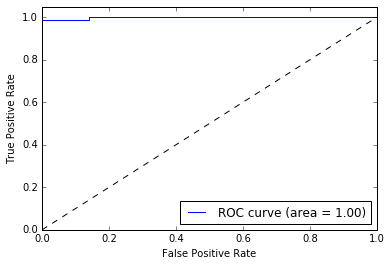

confusion matrix for train data:
[[162   5]
 [  7 280]]


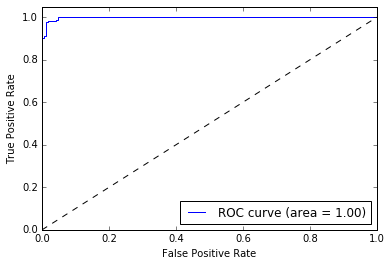

In [89]:
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import statsmodels.api as sm




#initial list to store different scores
acc_list_b1_test = []
precision_list_b1_test = []
recall_list_b1_test = []
fscore_list_b1_test = []
auc_list_b1_test = []

acc_list_b1_train = []
precision_list_b1_train = []
recall_list_b1_train = []
fscore_list_b1_train = []
auc_list_b1_train = []
for i in range(0,31,1):
    best_para_3(b_x_nor,m_x_nor,b_y,m_y,i)

In [90]:
print('The average of accuracy for test data is %f' %np.mean(acc_list_b1_test))
print('The average of precision for test data is %f' %np.mean(precision_list_b1_test))
print('The average of recall for test data is %f' %np.mean(recall_list_b1_test))
print('The average of fscore for test data is %f' %np.mean(fscore_list_b1_test))
print('The average of auc for test data is %f' %np.mean(auc_list_b1_test))

print('The average of accuracy for train data is %f' %np.mean(acc_list_b1_train))
print('The average of precision for train data is %f' %np.mean(precision_list_b1_train))
print('The average of recall for train data is %f' %np.mean(recall_list_b1_train))
print('The average of fscore for train data is %f' %np.mean(fscore_list_b1_train))
print('The average of auc for train data is %f' %np.mean(auc_list_b1_train))


The average of accuracy for test data is 0.963534
The average of precision for test data is 0.964821
The average of recall for test data is 0.977599
The average of fscore for test data is 0.970989
The average of auc for test data is 0.990987
The average of accuracy for train data is 0.981313
The average of precision for train data is 0.980176
The average of recall for train data is 0.990266
The average of fscore for train data is 0.985191
The average of auc for train data is 0.998289


##### &nbsp; ii. Semi-Supervised Learning/ Self-training: 
&nbsp;select 50% of the positive
class along with 50% of the negative class in the training set as labeled data
and the rest as unlabelled data. You can select them randomly.

&nbsp;A. Train an L1-penalized SVM to classify the labeled data Use normalized
data. Choose the penalty parameter using 5 fold cross validation.

&nbsp;B. Find the unlabeled data point that is the farthest to the decision boundary
of the SVM. Let the SVM label it (ignore its true label), and add it to
the labeled data, and retrain the SVM. Continue this process until all
unlabeled data are used. Test the final SVM on the test data andthe
average accuracy, precision, recall, F-score, and AUC, for both training
and test sets over your M runs. Plot the ROC and report the confusion
matrix for training and testing in one of the runs.

In [106]:
#A
b_y.replace('B', 1, inplace = True)
b_y.replace('M', 0, inplace = True)
m_y.replace('B', 1, inplace = True)
m_y.replace('M', 0, inplace = True)

b_x_train_arr, b_x_test_arr, b_y_train_arr, b_y_test_arr = train_test_split(b_x_nor, b_y, test_size=0.2,shuffle = True)
m_x_train_arr, m_x_test_arr, m_y_train_arr, m_y_test_arr = train_test_split(m_x_nor, m_y, test_size=0.2, shuffle = True)
b_label_x, b_unlabel_x, b_label_y, b_unlabel_y = train_test_split(b_x_train_arr, b_y_train_arr, test_size=0.5,shuffle = True)
m_label_x, m_unlabel_x, m_label_y, m_unlabel_y = train_test_split(m_x_train_arr, m_y_train_arr, test_size=0.5,shuffle = True)

#combine two classes of label and unlabel data
ini_label_x = np.concatenate((b_label_x , m_label_x))
ini_label_y = np.concatenate((b_label_y , m_label_y))
ini_unlabel_x = np.concatenate((b_unlabel_x , m_unlabel_x))
ini_unlabel_y = np.concatenate((b_unlabel_y , m_unlabel_y))


#combine test data
X_test = np.concatenate((b_x_test_arr, m_x_test_arr))
y_test = np.concatenate((b_y_test_arr, m_y_test_arr))



In [114]:
def para_b2(ini_label_x,ini_label_y,X_test,y_test):
    c_list_s = [1e-3,1e-2,1e-1,1,10,100,1000,10000,100000,1000000]

   
    for i in c_list_s:
        list_a = []
        lisvc = LinearSVC(penalty='l1',dual=False,C = i )
        lisvc.fit(ini_label_x, np.ravel(ini_label_y))
        score = lisvc.score(X_test, np.ravel(y_test))
        list_a.append(i)
        list_a.append(score)
        small_list.append(list_a)
    return small_list
small_list = []
small_list = para_b2(ini_label_x,ini_label_y,X_test,y_test)
print(small_list)




[[0.001, 0.3739130434782609], [0.01, 0.6260869565217392], [0.1, 0.6956521739130435], [1, 0.9478260869565217], [10, 0.9130434782608695], [100, 0.9217391304347826], [1000, 0.8956521739130435], [10000, 0.9043478260869565], [100000, 0.9130434782608695], [1000000, 0.9130434782608695]]


From the result, we could conclude that there is a peak point of the accuracy. To maintain a approximately 90% of accuracy, we choose the range[1,10,100,1000,10000,100000] as the final range of SVM.

In [229]:
def label_data(X_train,y_train,X_train_un,y_train_un):
    param_grid = {'C': [1,10,100,1000,10000,100000] }
    grid = GridSearchCV(LinearSVC(penalty='l1',dual=False ), param_grid, cv=5, scoring = 'accuracy')
    grid.fit(X_train, np.ravel(y_train))
    dis_1 = grid.decision_function(X_train_un)
    pre = grid.predict(X_train_un)
    #print(dis_1)
    #for i in range(len(dis_1)):
    index = abs(dis_1).argmax()
    #print(dis_1.argmax())
    #print(dis_1[index])
    #print(max(abs(i) for i in dis_1))
    new_point_y = pre[index]
    new_point_x = X_train_un[index]    
    return new_point_x, new_point_y,index
    


def best_para_b2(X_train,y_train,X_train_un,y_train_un,X_test,y_test,count):
    
    for i in range(0,228,1):
        new_x, new_y,index = label_data(X_train,y_train,X_train_un,y_train_un)
        X_train = np.concatenate((X_train,new_x.reshape(1,-1)),axis=0)   
        new_y_list = []
        new_y_list.append(new_y)
        new_y = np.array(new_y_list)
        y_train = np.concatenate((y_train,new_y),axis=0)
        X_train_un = np.delete(X_train_un, new_x, 0)
        y_train_un = np.delete(y_train_un, new_y, 0)
        
    param_grid = {'C': [1,10,100,1000,10000,100000] }
    grid = GridSearchCV(LinearSVC(penalty='l1',dual=False ), param_grid, cv=5, scoring = 'accuracy')
    grid.fit(X_train, np.ravel(y_train))
    
    #add the last unlabeled point to traindata
   
    #predict test 
    pre_result_test = grid.predict(X_test)
    y_scores_test=grid.decision_function(X_test)
    
    accuracy_score_test = grid.score(X_test, np.ravel(y_test))
    fscore_test = f1_score(y_test, pre_result_test) 
    precision_test = precision_score(y_test, pre_result_test)
    recall_test = recall_score(y_test, pre_result_test)
    auc_test = roc_auc_score(y_test, y_scores_test)
    
    acc_list_b2_test.append(accuracy_score_test)
    precision_list_b2_test.append(precision_test)
    recall_list_b2_test.append(recall_test)
    fscore_list_b2_test.append(fscore_test)
    auc_list_b2_test.append(auc_test)
    
    #predict train
    pre_result_train = grid.predict(X_train)
    y_scores_train=grid.decision_function(X_train)
    
    accuracy_score_train = grid.score(X_train, np.ravel(y_train))
    fscore_train = f1_score(y_train, pre_result_train) 
    precision_train = precision_score(y_train, pre_result_train)
    recall_train = recall_score(y_train, pre_result_train)
    auc_train = roc_auc_score(y_train, y_scores_train)
    
    acc_list_b2_train.append(accuracy_score_train)
    precision_list_b2_train.append(precision_train)
    recall_list_b2_train.append(recall_train)
    fscore_list_b2_train.append(fscore_train)
    auc_list_b2_train.append(auc_train)
    
    if count == 29:
        #print confusion matrix for test data
        print('confusion matrix for test data:')
        print(confusion_matrix(pre_result_test, y_test))
        
        #plot roc curve
        
        fpr_rf, tpr_rf, _ = roc_curve(y_test, y_scores_test)
        logit = auc(fpr_rf, tpr_rf)

        plt.plot(fpr_rf,tpr_rf,label='ROC curve (area = %0.2f)'%logit)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.show()
        
        #print confusion matrix for train data
        print('confusion matrix for train data:')
        print(confusion_matrix(pre_result_train, y_train))
        
        #plot roc curve
        
        fpr_rf_t, tpr_rf_t, _ = roc_curve(y_train, y_scores_train)
        logit_t = auc(fpr_rf_t, tpr_rf_t)

        plt.plot(fpr_rf_t,tpr_rf_t,label='ROC curve (area = %0.2f)'%logit_t)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.show()



confusion matrix for test data:
[[40  4]
 [ 3 68]]


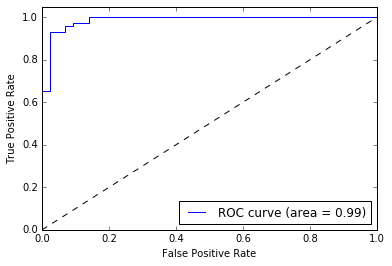

confusion matrix for train data:
[[166   3]
 [  4 281]]


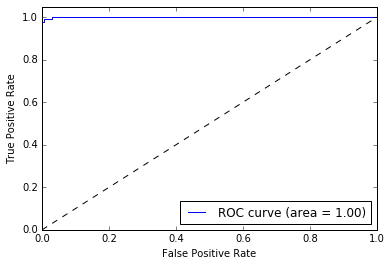

In [230]:
import warnings
warnings.filterwarnings('ignore')
#initial list to store different scores
acc_list_b2_test = []
precision_list_b2_test = []
recall_list_b2_test = []
fscore_list_b2_test = []
auc_list_b2_test = []

acc_list_b2_train = []
precision_list_b2_train = []
recall_list_b2_train = []
fscore_list_b2_train = []
auc_list_b2_train = []
b_x_train_arr, b_x_test_arr, b_y_train_arr, b_y_test_arr = train_test_split(b_x_nor, b_y, test_size=0.2,shuffle = True)
m_x_train_arr, m_x_test_arr, m_y_train_arr, m_y_test_arr = train_test_split(m_x_nor, m_y, test_size=0.2, shuffle = True)
for i in range(0,30,1):
    
    b_label_x, b_unlabel_x, b_label_y, b_unlabel_y = train_test_split(b_x_train_arr, b_y_train_arr, test_size=0.5,shuffle = True)
    m_label_x, m_unlabel_x, m_label_y, m_unlabel_y = train_test_split(m_x_train_arr, m_y_train_arr, test_size=0.5,shuffle = True)

    #combine two classes of label and unlabel data
    ini_label_x = np.concatenate((b_label_x , m_label_x))
    ini_label_y = np.concatenate((b_label_y , m_label_y))
    ini_unlabel_x = np.concatenate((b_unlabel_x , m_unlabel_x))
    ini_unlabel_y = np.concatenate((b_unlabel_y , m_unlabel_y))


    #combine test data
    X_test = np.concatenate((b_x_test_arr, m_x_test_arr))
    y_test = np.concatenate((b_y_test_arr, m_y_test_arr))
    best_para_b2(ini_label_x,ini_label_y,ini_unlabel_x,ini_unlabel_y,X_test,y_test,i)


In [234]:
print('The average of accuracy for test data is %f' %np.mean(acc_list_b2_test))
print('The average of precision for test data is %f' %np.mean(precision_list_b2_test))
print('The average of recall for test data is %f' %np.mean(recall_list_b2_test))
print('The average of fscore for test data is %f' %np.mean(fscore_list_b2_test))
print('The average of auc for test data is %f' %np.mean(auc_list_b2_test))

print('The average of accuracy for train data is %f' %np.mean(acc_list_b2_train))
print('The average of precision for train data is %f' %np.mean(precision_list_b2_train))
print('The average of recall for train data is %f' %np.mean(recall_list_b2_train))
print('The average of fscore for train data is %f' %np.mean(fscore_list_b2_train))
print('The average of auc for train data is %f' %np.mean(auc_list_b2_train))



The average of accuracy for test data is 0.963478
The average of precision for test data is 0.971357
The average of recall for test data is 0.970370
The average of fscore for test data is 0.970766
The average of auc for test data is 0.985863
The average of accuracy for train data is 0.994934
The average of precision for train data is 0.994801
The average of recall for train data is 0.996238
The average of fscore for train data is 0.995515
The average of auc for train data is 0.999872


##### &nbsp; iii Unsupervised Learning:
&nbsp;Run k-means algorithm on the whole training
set. Ignore the labels of the data, and assume k = 2.

&nbsp;A. Run the k-means algorithm multiple times. Make sure that you initialize
the algoritm randomly. How do you make sure that the algorithm was
not trapped in a local minimum?

##### Answer: We choose to change the random_state to avoid trapping in a local minimum because different random_state will cause different initial centers.

&nbsp;B. Compute the centers of the two clusters and find the closest 30 data
points to each center. Read the true labels of those 30 data points and
take a majority poll within them. The majority poll becomes the label
predicted by k-means for the members of each cluster. Then compare the
labels provided by k-means with the true labels of the training data and
report the average accuracy, precision, recall, F-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.

&nbsp;C. Classify test data based on their proximity to the centers of the clusters.
Report the average accuracy, precision, recall, F-score, and AUC over M
runs, and ROC and the confusion matrix for one of the runs for the test
data.

In [353]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
def d3_kmeans(X_train,y_train,X_test,y_test,count):
    kmeans = KMeans(n_clusters=2).fit(X_train)
    
    label_arr = kmeans.labels_
    
    cluster_0_dis = []
    
    cluster_1_dis = []
    
    for i in range(0,454,1):
        #X_train[i]
        distance_0 = np.sqrt(np.sum(np.square(X_train[i]-kmeans.cluster_centers_[0])))
        distance_1 = np.sqrt(np.sum(np.square(X_train[i]-kmeans.cluster_centers_[1])))
        cluster_0_dis.append(distance_0)
        cluster_1_dis.append(distance_1)
    idx_0 = sorted(range(len(cluster_0_dis)), key=lambda x: cluster_0_dis[x])[-30:]
    idx_1 = sorted(range(len(cluster_1_dis)), key=lambda x: cluster_1_dis[x])[-30:]
    idx_0_sum = []
    idx_1_sum = []
    for i in idx_0:
        idx_0_sum.append(y_train[i])
    for i in idx_1:
        idx_1_sum.append(y_train[i])
    maj_0 = max(set(idx_0_sum), key = idx_0_sum.count)
    maj_1 = max(set(idx_1_sum), key = idx_1_sum.count)

    pre_train_label = []
    for i in kmeans.labels_:
        if i==0:
            pre_train_label.append(maj_1)
        else:
            pre_train_label.append(maj_0)

    
   
    accuracy_score_train = accuracy_score(y_train, pre_train_label)
    fscore_train = f1_score(y_train, pre_train_label) 
    precision_train = precision_score(y_train, pre_train_label)
    recall_train = recall_score(y_train, pre_train_label)
    
    acc_list_b3_train.append(accuracy_score_train)
    precision_list_b3_train.append(precision_train)
    recall_list_b3_train.append(recall_train)
    fscore_list_b3_train.append(fscore_train)
    fpr_rf, tpr_rf, _ = roc_curve(y_train, pre_train_label)
    logit_train = auc(fpr_rf, tpr_rf)
    auc_list_b3_train.append(logit_train)
    
    #test data
    pre_test_label = []
    pre_test = kmeans.predict(X_test)
    for i in pre_test:
        if i==0:
            pre_test_label.append(maj_1)
        else:
            pre_test_label.append(maj_0)
  
    accuracy_score_test = accuracy_score(y_test, pre_test_label)
    fscore_test = f1_score(y_test, pre_test_label) 
    precision_test = precision_score(y_test, pre_test_label)
    recall_test = recall_score(y_test, pre_test_label)
    fpr_rf, tpr_rf, _ = roc_curve(y_test, pre_test_label)
    logit_test = auc(fpr_rf, tpr_rf)
    auc_list_b3_test.append(logit_test)
    
    acc_list_b3_test.append(accuracy_score_test)
    precision_list_b3_test.append(precision_test)
    recall_list_b3_test.append(recall_test)
    fscore_list_b3_test.append(fscore_test)
    if count == 29:
        
        print('confusion matrix for test data:')
        print(confusion_matrix(pre_test_label, y_test))
        
        #plot roc curve

        fpr_rf, tpr_rf, _ = roc_curve(y_test, pre_test_label)
        logit = auc(fpr_rf, tpr_rf)

        plt.plot(fpr_rf,tpr_rf,label='ROC curve (area = %0.2f)'%logit)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.show()
        
        #print confusion matrix for train data
        print('confusion matrix for train data:')
        print(confusion_matrix(pre_train_label, y_train))
        
        #plot roc curve
        
        fpr_rf_t, tpr_rf_t, _ = roc_curve(y_train, pre_train_label)
        logit_t = auc(fpr_rf_t, tpr_rf_t)

        plt.plot(fpr_rf_t,tpr_rf_t,label='ROC curve (area = %0.2f)'%logit_t)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.show()


    


confusion matrix for test data:
[[70 11]
 [ 2 32]]


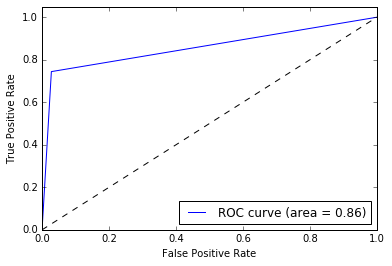

confusion matrix for train data:
[[280  47]
 [  5 122]]


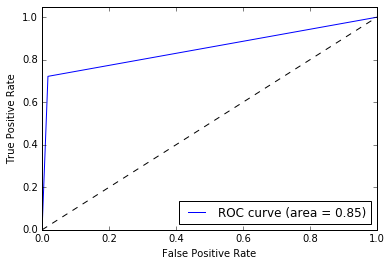

In [354]:

acc_list_b3_test = []
precision_list_b3_test = []
recall_list_b3_test = []
fscore_list_b3_test = []
auc_list_b3_test = []

acc_list_b3_train = []
precision_list_b3_train = []
recall_list_b3_train = []
fscore_list_b3_train = []
auc_list_b3_train = []

b_y.replace('M', 0, inplace = True)
b_y.replace('B', 1, inplace = True)
m_y.replace('M', 0, inplace = True)
m_y.replace('B', 1, inplace = True)
b_x_train_arr, b_x_test_arr, b_y_train_arr, b_y_test_arr = train_test_split(b_x_nor, b_y, test_size=0.2,shuffle = True)
m_x_train_arr, m_x_test_arr, m_y_train_arr, m_y_test_arr = train_test_split(m_x_nor, m_y, test_size=0.2, shuffle = True)

#combine the train data and test data
X_train = np.concatenate((b_x_train_arr, m_x_train_arr))
y_train = np.concatenate((b_y_train_arr, m_y_train_arr))
X_test = np.concatenate((b_x_test_arr, m_x_test_arr))
y_test = np.concatenate((b_y_test_arr, m_y_test_arr))

for i in range(0,30,1):
    d3_kmeans(X_train,y_train,X_test,y_test,i)


In [355]:
print('The average of accuracy for test data is %f' %np.mean(acc_list_b3_test))
print('The average of precision for test data is %f' %np.mean(precision_list_b3_test))
print('The average of recall for test data is %f' %np.mean(recall_list_b3_test))
print('The average of fscore for test data is %f' %np.mean(fscore_list_b3_test))
print('The average of auc for test data is %f' %np.mean(auc_list_b3_test))

print('The average of accuracy for train data is %f' %np.mean(acc_list_b3_train))
print('The average of precision for train data is %f' %np.mean(precision_list_b3_train))
print('The average of recall for train data is %f' %np.mean(recall_list_b3_train))
print('The average of fscore for train data is %f' %np.mean(fscore_list_b3_train))
print('The average of auc for train data is %f' %np.mean(auc_list_b3_train))



The average of accuracy for test data is 0.886957
The average of precision for test data is 0.941176
The average of recall for test data is 0.744186
The average of fscore for test data is 0.831169
The average of auc for test data is 0.858204
The average of accuracy for train data is 0.885903
The average of precision for train data is 0.962155
The average of recall for train data is 0.721893
The average of fscore for train data is 0.824883
The average of auc for train data is 0.852526


##### &nbsp; iv. Spectral Clustering: 
&nbsp;Repeat 1(b)iii using spectral clustering, which is clustering
based on kernels. Research what spectral clustering is. Use RBF
kernel.


In [478]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.cluster import SpectralClustering

def get_gamma(X_train,y_train):
    gamma_list = range(0,31,1)
    gamma_pre_list = []
    for i in gamma_list:
        clustering = SpectralClustering(n_clusters=2,random_state=0,gamma = i, eigen_tol=1)
        pre_gamma = clustering.fit_predict(X_train)
        count_1 = 0
        count_0 = 0
        
        for j in pre_gamma:
            if j == 0:
                count_0 +=1
            else:
                count_1 +=1

        if count_0 >= count_1:
            gamma_pre_list.append(abs(count_0/count_1-1.686))
        else:
            gamma_pre_list.append(abs(count_1/count_0-1.686))
    gamma_index = np.argmin(gamma_pre_list)
    gamma = gamma_list[gamma_index]  
    return gamma

def d4_sc(X_train,y_train,X_test,y_test,count,i):
    clustering = SpectralClustering(n_clusters=2,random_state=count,gamma = i,eigen_tol=1)
    clustering.fit(X_train)
    label_arr = clustering.labels_ 
    
    cluster_0_index = []
    cluster_1_index = []
    for i in range(len(label_arr)):
        if label_arr[i] == 0:
            cluster_0_index.append(i)
        else:
            cluster_1_index.append(i)

    #split data into two cluster
    cluster_0 = []
    cluster_1 = []
    for j in cluster_0_index:
        cluster_0.append(X_train[j])
    for n in cluster_1_index:
        cluster_1.append(X_train[n])
        
    #calculate two centers
    center_0 = np.mean(cluster_0,axis = 0)
    center_1 = np.mean(cluster_1,axis = 0)
    cluster_0_dis = []   
    cluster_1_dis = []

    for i in range(0,454,1):
        #X_train[i]
        distance_0 = np.sqrt(np.sum(np.square(X_train[i]-center_0)))
        distance_1 = np.sqrt(np.sum(np.square(X_train[i]-center_1)))
        cluster_0_dis.append(distance_0)
        cluster_1_dis.append(distance_1)
    idx_0 = sorted(range(len(cluster_0_dis)), key=lambda x: cluster_0_dis[x])[-30:]
    idx_1 = sorted(range(len(cluster_1_dis)), key=lambda x: cluster_1_dis[x])[-30:]
  
    idx_0_sum = []
    idx_1_sum = []
    for i in idx_0:
        idx_0_sum.append(y_train[i])
    for i in idx_1:
        idx_1_sum.append(y_train[i])
   
    maj_0 = max(set(idx_0_sum), key = idx_0_sum.count)
    maj_1 = max(set(idx_1_sum), key = idx_1_sum.count)
    
    pre_train_label = []
    for i in label_arr:
        if i==0:
            pre_train_label.append(maj_1)
        else:
            pre_train_label.append(maj_0)
   
    #train data
    
    accuracy_score_train = accuracy_score(y_train, pre_train_label)
    fscore_train = f1_score(y_train, pre_train_label) 
    precision_train = precision_score(y_train, pre_train_label)
    recall_train = recall_score(y_train, pre_train_label)
    
    acc_list_b4_train.append(accuracy_score_train)
    precision_list_b4_train.append(precision_train)
    recall_list_b4_train.append(recall_train)
    fscore_list_b4_train.append(fscore_train)
    fpr_rf, tpr_rf, _ = roc_curve(y_train, pre_train_label)
    logit_train = auc(fpr_rf, tpr_rf)
    auc_list_b4_train.append(logit_train)
    
    #test data
    pre_test_label = []
    clustering_test = SpectralClustering(n_clusters=2,random_state=count,gamma = i)
    pre_test = clustering_test.fit_predict(X_test)
    
    for i in pre_test:
        if i==0:
            pre_test_label.append(maj_1)
        else:
            pre_test_label.append(maj_0)

    accuracy_score_test = accuracy_score(y_test, pre_test_label)
    fscore_test = f1_score(y_test, pre_test_label) 
    precision_test = precision_score(y_test, pre_test_label)
    recall_test = recall_score(y_test, pre_test_label)
    fpr_rf, tpr_rf, _ = roc_curve(y_test, pre_test_label)
    logit_test = auc(fpr_rf, tpr_rf)
    auc_list_b4_test.append(logit_test)
    
    acc_list_b4_test.append(accuracy_score_test)
    precision_list_b4_test.append(precision_test)
    recall_list_b4_test.append(recall_test)
    fscore_list_b4_test.append(fscore_test)
    if count == 20:
        
        print('confusion matrix for test data:')
        print(confusion_matrix(pre_test_label, y_test))
        
        #plot roc curve   

        fpr_rf, tpr_rf, _ = roc_curve(y_test, pre_test_label)
        logit = auc(fpr_rf, tpr_rf)

        plt.plot(fpr_rf,tpr_rf,label='ROC curve (area = %0.2f)'%logit)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.show()
        
        #print confusion matrix for train data
        print('confusion matrix for train data:')
        print(confusion_matrix(pre_train_label, y_train))
        
        #plot roc curve

        fpr_rf_t, tpr_rf_t, _ = roc_curve(y_train, pre_train_label)
        logit_t = auc(fpr_rf_t, tpr_rf_t)

        plt.plot(fpr_rf_t,tpr_rf_t,label='ROC curve (area = %0.2f)'%logit_t)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.show()




In [418]:

b_y.replace('B', 1, inplace = True)
m_y.replace('M', 0, inplace = True)


confusion matrix for test data:
[[43 71]
 [ 0  1]]


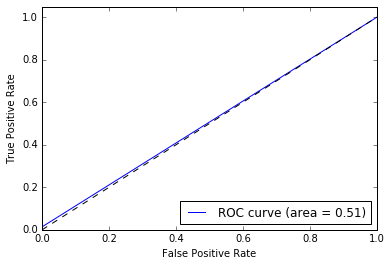

confusion matrix for train data:
[[123   7]
 [ 46 278]]


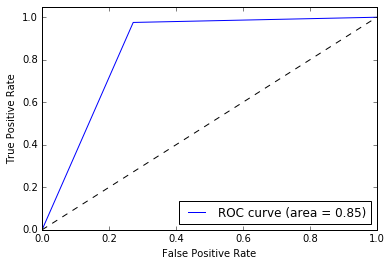

In [481]:
acc_list_b4_test = []
precision_list_b4_test = []
recall_list_b4_test = []
fscore_list_b4_test = []
auc_list_b4_test = []

acc_list_b4_train = []
precision_list_b4_train = []
recall_list_b4_train = []
fscore_list_b4_train = []
auc_list_b4_train = []
b_x_train_arr, b_x_test_arr, b_y_train_arr, b_y_test_arr = train_test_split(b_x_nor, b_y, test_size=0.2,shuffle = True)
m_x_train_arr, m_x_test_arr, m_y_train_arr, m_y_test_arr = train_test_split(m_x_nor, m_y, test_size=0.2, shuffle = True)

#combine the train data and test data
X_train = np.concatenate((b_x_train_arr, m_x_train_arr))
y_train = np.concatenate((b_y_train_arr, m_y_train_arr))
X_test = np.concatenate((b_x_test_arr, m_x_test_arr))
y_test = np.concatenate((b_y_test_arr, m_y_test_arr))



for i in range(0,30,1):
    gamma = get_gamma(X_train,y_train)
    #print(gamma)
    d4_sc(X_train,y_train,X_test,y_test,i,gamma)

In [482]:
print('The average of accuracy for test data is %f' %np.mean(acc_list_b4_test))
print('The average of precision for test data is %f' %np.mean(precision_list_b4_test))
print('The average of recall for test data is %f' %np.mean(recall_list_b4_test))
print('The average of fscore for test data is %f' %np.mean(fscore_list_b4_test))
print('The average of auc for test data is %f' %np.mean(auc_list_b4_test))

print('The average of accuracy for train data is %f' %np.mean(acc_list_b4_train))
print('The average of precision for train data is %f' %np.mean(precision_list_b4_train))
print('The average of recall for train data is %f' %np.mean(recall_list_b4_train))
print('The average of fscore for train data is %f' %np.mean(fscore_list_b4_train))
print('The average of auc for train data is %f' %np.mean(auc_list_b4_train))

The average of accuracy for test data is 0.571594
The average of precision for test data is 0.621790
The average of recall for test data is 0.474537
The average of fscore for test data is 0.465658
The average of auc for test data is 0.604323
The average of accuracy for train data is 0.883260
The average of precision for train data is 0.858025
The average of recall for train data is 0.975439
The average of fscore for train data is 0.912972
The average of auc for train data is 0.851625


##### &nbsp;v. One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expects that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.

From the result I got above. About this dataset, the supervised learning and semi-supervised learning work very well, the accuracies are very high and similar. However, the result of unsupervised is not as good as the first two models. 

### 2. Active Learning Using Support Vector Machines
##### &nbsp; (a) Download the banknote authentication Data Set from: https://archive.ics.uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.

In [521]:
#load csv 
data = pd.read_csv('banknote.csv', sep = ',', header = None)
column_name_2 = []
for j in range(0,5,1):
    column_name_2.append(j)
data.columns = column_name_2
X_data = data[[0,1,2,3]]
y_data = data[4]

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_data, y_data, test_size=472,shuffle = True)



##### &nbsp;(b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.
&nbsp; i. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 10-fold cross validation.2 Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.

In [673]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold
c_list = [0.001,0.01,0.1,1,10,100,1000,10000]

def best_c(X_train, y_train,random_i):
    kf = KFold(n_splits=10)
    score_list = []
    for i in c_list:
        score_list_1 = []
        for train_index, test_index in kf.split(X_train,y_train):
            train_x_k = pd.DataFrame(X_train.iloc[train_index])
            train_y_k =pd.DataFrame(y_train.iloc[train_index])
            test_x_k = pd.DataFrame(X_train.iloc[test_index])
            test_y_k = pd.DataFrame(y_train.iloc[test_index])
            
            lsvc = LinearSVC(C = i,penalty = 'l1', random_state = random_i,dual=False)
            lsvc.fit(train_x_k, train_y_k)
            score_1 = lsvc.score(test_x_k,test_y_k)
            score_list_1.append(score_1)

            score = np.mean(score_list_1)
        score_list.append(score)
    best_index = score_list.index(max(score_list))
    best_c = c_list[best_index]
    return best_c

def ave_error_50(X_train, y_train,X_test, y_test):
    test_error50_list = []
    for i in range(0,50,1):
        random_i = i
        c =  best_c(X_train, y_train,random_i)
        lsvc = LinearSVC(C = c,penalty = 'l1', random_state = random_i,dual=False)
        lsvc.fit(X_train, y_train)
        accuracy = lsvc.score(X_test,y_test)
        test_error50_list.append(1-accuracy)
    test_error.append(np.mean(test_error50_list))

In [701]:
#load csv 
data = pd.read_csv('banknote.csv', sep = ',', header = None)
column_name_2 = []
for j in range(0,5,1):
    column_name_2.append(j)
data.columns = column_name_2
X_data = data[[0,1,2,3]]
y_data = data[4]

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_data, y_data, test_size=472,shuffle = True)
X_train_final = X_train_2
y_train_final = y_train_2

test_error = []
X_train = pd.DataFrame()
y_train = pd.DataFrame()

for i in range(0,90,1):
    if i !=89:
        X_train_1, X_rest_1, y_train_1, y_rest_1 = train_test_split(X_train_2, y_train_2, train_size=10,shuffle = True)
        frames_x = [X_train,X_train_1]
        X_train = pd.concat(frames_x)
        frames_y = [y_train,y_train_1]
        y_train = pd.concat(frames_y)
       
        ave_error_50(X_train,y_train,X_test_2,y_test_2)
        drop_A=X_train_1.index.tolist()
        X_train_2 = X_train_2.drop(drop_A)
        y_train_2 = y_train_2.drop(drop_A)
        
        print(X_train_2.shape)
    else:
       
        ave_error_50(X_train_final,y_train_final,X_test_2,y_test_2)
print(test_error)

(890, 4)
(880, 4)
(870, 4)
(860, 4)
(850, 4)
(840, 4)
(830, 4)
(820, 4)
(810, 4)
(800, 4)
(790, 4)
(780, 4)
(770, 4)
(760, 4)
(750, 4)
(740, 4)
(730, 4)
(720, 4)
(710, 4)
(700, 4)
(690, 4)
(680, 4)
(670, 4)
(660, 4)
(650, 4)
(640, 4)
(630, 4)
(620, 4)
(610, 4)
(600, 4)
(590, 4)
(580, 4)
(570, 4)
(560, 4)
(550, 4)
(540, 4)
(530, 4)
(520, 4)
(510, 4)
(500, 4)
(490, 4)
(480, 4)
(470, 4)
(460, 4)
(450, 4)
(440, 4)
(430, 4)
(420, 4)
(410, 4)
(400, 4)
(390, 4)
(380, 4)
(370, 4)
(360, 4)
(350, 4)
(340, 4)
(330, 4)
(320, 4)
(310, 4)
(300, 4)
(290, 4)
(280, 4)
(270, 4)
(260, 4)
(250, 4)
(240, 4)
(230, 4)
(220, 4)
(210, 4)
(200, 4)
(190, 4)
(180, 4)
(170, 4)
(160, 4)
(150, 4)
(140, 4)
(130, 4)
(120, 4)
(110, 4)
(100, 4)
(90, 4)
(80, 4)
(70, 4)
(60, 4)
(50, 4)
(40, 4)
(30, 4)
(20, 4)
(10, 4)
[0.1455084745762712, 0.01906779661016944, 0.038135593220339, 0.02016949152542372, 0.01906779661016944, 0.01906779661016944, 0.01915254237288131, 0.016949152542372836, 0.029703389830508513, 0.02940677966101698

&nbsp; ii. Train a SVM with a pool of 10 randomly selected data points from the training
set3 using linear kernel and L1 penalty. Select the parameters of the SVM with 10-fold cross validation. Choose the 10 closest data points in the training
set to the hyperplane of the SVM4 and add them to the pool. Do not replace
the samples back into the training set. Train a new SVM using the pool.
Repeat this process until all training data is used. You will have 90 SVMs
that were trained using 10, 20, 30,..., 900 data points and their 90 test errors.
You have implemented active learning

In [665]:
c_list = [0.001,0.01,0.1,1,10,100,1000,10000]

def best_c2(X_train, y_train,random_i):
    skf = StratifiedKFold(n_splits=10)
    score_list = []
    for i in c_list:
        score_list_1 = []
        for train_index, test_index in skf.split(X_train,y_train):
            train_x_k = pd.DataFrame(X_train.iloc[train_index])
            train_y_k =pd.DataFrame(y_train.iloc[train_index])
            test_x_k = pd.DataFrame(X_train.iloc[test_index])
            test_y_k = pd.DataFrame(y_train.iloc[test_index])
            print(train_y_k)
            lsvc = LinearSVC(C = i,penalty = 'l1', random_state = random_i,dual=False)
            lsvc.fit(train_x_k, train_y_k)
            score_1 = lsvc.score(test_x_k,test_y_k)
            score_list_1.append(score_1)
        score = np.mean(score_list_1)
        score_list.append(score)
    best_index = score_list.index(max(score_list))
    
    
    return best_c

def ave_error_50_0(X_train, y_train,X_test, y_test):
    test_error50_list = []
    for i in range(0,50,1):
        random_i = i
        c =  best_c(X_train, y_train,random_i)
        lsvc = LinearSVC(C = c,penalty = 'l1', random_state = random_i,dual=False)
        lsvc.fit(X_train, y_train)
        accuracy = lsvc.score(X_test,y_test)
        test_error50_list.append(1-accuracy)
    test_error_2.append(np.mean(test_error50_list))

In [682]:
data = pd.read_csv('banknote.csv', sep = ',', header = None)
column_name_2 = []
for j in range(0,5,1):
    column_name_2.append(j)
data.columns = column_name_2
X_data = data[[0,1,2,3]]
y_data = data[4]

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_data, y_data, test_size=472,shuffle = True)
X_train_final_2 = X_train_2
y_train_final_2 = y_train_2

test_error_2 = []
X_train = pd.DataFrame()
y_train = pd.DataFrame()
for i in range(0,90,1):
    if i == 0:
        #print(i)
        X_train_1, X_rest_1, y_train_1, y_rest_1 = train_test_split(X_train_2, y_train_2, train_size=10,shuffle = True)
        
        ave_error_50_0(X_train_1,y_train_1,X_test_2,y_test_2)
        drop_A=X_train_1.index.tolist()
        X_train_2 = X_train_2.drop(drop_A)
        y_train_2 = y_train_2.drop(drop_A)
        
    if i !=89 and i != 0:
        c_2 = best_c(X_train_1,y_train_1,5)
        lsvc = LinearSVC(C = c_2,penalty = 'l1', random_state = 5,dual=False)
        lsvc.fit(X_train_1,y_train_1)
        dis_array = lsvc.decision_function(X_train_2)
        
        dis = dis_array.tolist()
        idx = sorted(range(len(dis)), key=lambda x: abs(dis[x]))[:10]
       
        pin1 = pd.DataFrame(X_train_2.iloc[idx])
        pin2 = y_train_2.iloc[idx]
      
        df_x = pin1
        df_y = pin2

        frames_x = [X_train_1,df_x]
        X_train_1 = pd.concat(frames_x)
        frames_y = [y_train_1,df_y]
        y_train_1 = pd.concat(frames_y,axis = 0)
       
        ave_error_50_0(X_train_1,y_train_1,X_test_2,y_test_2)
        drop_A=pin1.index.tolist()
        X_train_2 = X_train_2.drop(drop_A)
        y_train_2 = y_train_2.drop(drop_A)
        
        print(X_train_2.shape)
    if i == 89:
        ave_error_50_0(X_train_final_2,y_train_final_2,X_test_2,y_test_2)
print(test_error_2)

(880, 4)
(870, 4)
(860, 4)
(850, 4)
(840, 4)
(830, 4)
(820, 4)
(810, 4)
(800, 4)
(790, 4)
(780, 4)
(770, 4)
(760, 4)
(750, 4)
(740, 4)
(730, 4)
(720, 4)
(710, 4)
(700, 4)
(690, 4)
(680, 4)
(670, 4)
(660, 4)
(650, 4)
(640, 4)
(630, 4)
(620, 4)
(610, 4)
(600, 4)
(590, 4)
(580, 4)
(570, 4)
(560, 4)
(550, 4)
(540, 4)
(530, 4)
(520, 4)
(510, 4)
(500, 4)
(490, 4)
(480, 4)
(470, 4)
(460, 4)
(450, 4)
(440, 4)
(430, 4)
(420, 4)
(410, 4)
(400, 4)
(390, 4)
(380, 4)
(370, 4)
(360, 4)
(350, 4)
(340, 4)
(330, 4)
(320, 4)
(310, 4)
(300, 4)
(290, 4)
(280, 4)
(270, 4)
(260, 4)
(250, 4)
(240, 4)
(230, 4)
(220, 4)
(210, 4)
(200, 4)
(190, 4)
(180, 4)
(170, 4)
(160, 4)
(150, 4)
(140, 4)
(130, 4)
(120, 4)
(110, 4)
(100, 4)
(90, 4)
(80, 4)
(70, 4)
(60, 4)
(50, 4)
(40, 4)
(30, 4)
(20, 4)
(10, 4)
[0.13771186440677963, 0.0423728813559322, 0.044491525423728806, 0.025423728813559365, 0.018644067796610164, 0.01906779661016944, 0.016949152542372836, 0.008474576271186418, 0.006355932203389814, 0.006355932203389814, 

##### &nbsp; (C)Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.

In [703]:
print('The ave test errors of 2b(i):')
print(test_error)

print('The ave test errors of 2b(ii):')
print(test_error_2)

The ave test errors of 2b(i):
[0.1455084745762712, 0.01906779661016944, 0.038135593220339, 0.02016949152542372, 0.01906779661016944, 0.01906779661016944, 0.01915254237288131, 0.016949152542372836, 0.029703389830508513, 0.02940677966101698, 0.012711864406779627, 0.010593220338983023, 0.012711864406779627, 0.012711864406779627, 0.010593220338983023, 0.010593220338983023, 0.012711864406779627, 0.016949152542372836, 0.016949152542372836, 0.01944915254237285, 0.012711864406779627, 0.012711864406779627, 0.011228813559322004, 0.010677966101694887, 0.010593220338983023, 0.010593220338983023, 0.010677966101694887, 0.011822033898305053, 0.012499999999999966, 0.012076271186440645, 0.01156779661016946, 0.008813559322033876, 0.008474576271186418, 0.008474576271186418, 0.008474576271186418, 0.010042372881355906, 0.008644067796610146, 0.008601694915254214, 0.006355932203389814, 0.008474576271186418, 0.008474576271186418, 0.004237288135593209, 0.008474576271186418, 0.004237288135593209, 0.004237288135

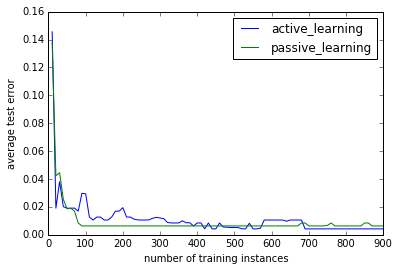

In [702]:
import matplotlib.pyplot as plt

#plot
x = list(range(10,910,10))

k1 = test_error
k2 = test_error_2
plt.plot(x,k1,color = 'b',label="active_learning")
plt.plot(x,k2,color = 'g',label="passive_learning")
plt.xlabel("number of training instances")
plt.ylabel("average test error")
plt.legend(loc = "best")
plt.show()


From the result above, the passive_learning performs better than active_learning. The ave test error curve is more flat.